Contents

#1 Import Libraries and Data

#2 Drop PII data 

#3 Regional Segementation

#4 Exclude low-activity customers

#5 Create customer profiles

#6 Profile distribution visualizations

#7 Get descriptive statistics on profiles

#8 Create crosstabs to compare customer profiles with regions and departments

#9 Visualize profile differences in department preferences & address key questions

#10 Export Data

#11 Check dimensions

1. Import Libraries and Data

In [1]:
#import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#define path 
path = '/Users/wenboyang/Desktop/Data Analytics/05-08-2023 Instacart Basket Analysis /'

In [3]:
#import customer_merged data 
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','customer_merged.pkl'))

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,mean_freq,freq_flag,first_name,last_name,gender,state,age,date_joined,dependents,marital_status,income,First Name
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Linda
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Linda
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Linda
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Linda
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Linda


Step 2: PII data: first and last names are PII data that is not needed for analysis so they can be dropped 

In [6]:
#drop first name and last name columns
df = df.drop(columns = ['first_name', 'last_name'])  

Step 3: Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [7]:
#create 'Region' cell
region = []

In [8]:
df['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [9]:
#Assign regions 
for value in df['state']:
    if value in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [10]:
region 

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [11]:
#create new region columnm
df['region'] = region

In [12]:
#check df
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,mean_freq,freq_flag,gender,state,age,date_joined,dependents,marital_status,income,First Name,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South


In [13]:
#drop First Name column 
df = df.drop(columns = ['First Name'])  

In [14]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,mean_freq,freq_flag,gender,state,age,date_joined,dependents,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


Step 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [18]:
#locate orders less than 5 
df.loc[df['max_order'] < 5, 'low_order_flag'] = 'Low-activity customer'

In [19]:
df.loc[df['max_order']>=5, 'low_order_flag']='High-activity customer'

In [20]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,mean_freq,freq_flag,gender,state,age,date_joined,dependents,marital_status,income,region,low_order_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer


In [21]:
#create new df where low order customers are excluded 
df_no_low = df[df['low_order_flag'] == 'High-activity customer']

In [22]:
#export sample 
df_no_low.to_pickle(os.path.join(path,'02 Data','Prepared Data','customer_merged_no_low.pkl'))

In [23]:
df_no_low.shape

(30964564, 33)

Step 5: Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns

Determine whether there’s a difference in spending habits between the different U.S. regions.

In [15]:
#create crosstab 
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [16]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,4729931,2867394
Northeast,3608045,2114691
South,6767258,4024627
West,5220433,3072480


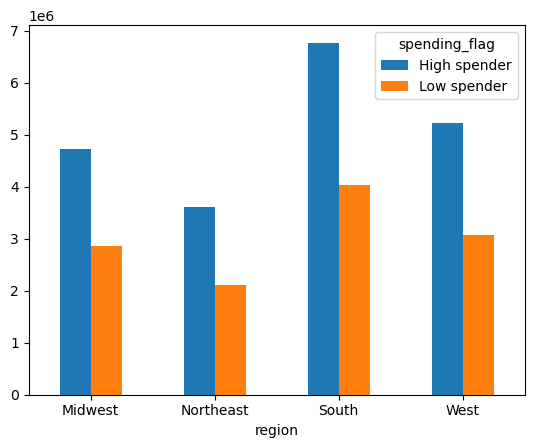

In [17]:
#create bar chart to show differences
bar = crosstab.plot.bar(rot=0)

In [24]:
#Create age profile
df.loc[df['age'] <= 35, 'age_profile'] = 'Young'
df.loc[(df['age'] > 35) & (df['age'] < 65), 'age_profile'] = 'Middle-aged'
df.loc[df['age'] >= 65, 'age_profile'] = 'Senior'

In [25]:
#Create income profile 
df.loc[df['income']<40000, 'income_profile'] = 'low income'
df.loc[(df['income'] >= 40000) & (df['income'] < 100000), 'income_profile'] = 'middle income'
df.loc[df['income']>=100000, 'income_profile']='high income'

In [26]:
#create department_id and user_id crosstab for diet profile
diet_crosstab = pd.crosstab(df['department_id'], df['user_id'], dropna = False)

In [27]:
# Assigning diet flags to users and storing it in a dictionary
diet_dict = dict()
for user in diet_crosstab:
    workinglist = diet_crosstab[user].tolist()
    if workinglist[12] == 0 and workinglist[16] == 0:
        diet_dict[user] = 'Vegan'
    elif workinglist[12] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Meat-consumer'

In [28]:
# assigning user flags to the list
diet_list = []
for user in df['user_id']:
    diet_list.append(diet_dict[user])

In [29]:
#Adding 'diet_profile' column to df_reg_cust
df['diet_profile'] = diet_list

In [30]:
df

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,mean_freq,freq_flag,gender,state,age,date_joined,dependents,marital_status,income,region,low_order_flag,age_profile,income_profile,diet_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,both,Mid-range product,Least busy,Slowest days,Fewest orders,26,Regular customer,13.500000,High spender,7.640000,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High-activity customer,Young,middle income,Vegan
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Mid-range product,Regularly busy,Regularly days,Most orders,4,New customer,2.500000,Low spender,26.333333,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low-activity customer,Young,middle income,Vegan
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Mid-range product,Regularly busy,Busiest days,Most orders,4,New customer,2.500000,Low spender,26.333333,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low-activity customer,Young,middle income,Vegan
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Mid-range product,Regularly busy,Regularly days,Most orders,4,New customer,2.500000,Low spender,26.333333,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low-activity customer,Young,middle income,Vegan


In [31]:
filtered_df = df[df['department_id'].isin([12, 16])]

In [32]:
filtered_df

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,mean_freq,freq_flag,gender,state,age,date_joined,dependents,marital_status,income,region,low_order_flag,age_profile,income_profile,diet_profile
10,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regularly busy,Regularly days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
39,473747,1,3,3,12,21.0,25133,4,0,Organic String Cheese,21,16,8.6,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
40,2254736,1,4,4,7,29.0,25133,4,1,Organic String Cheese,21,16,8.6,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
41,431534,1,5,4,15,28.0,25133,4,1,Organic String Cheese,21,16,8.6,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
42,3367565,1,6,2,7,19.0,25133,4,1,Organic String Cheese,21,16,8.6,both,Mid-range product,Regularly busy,Regularly days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404546,1465225,122023,4,5,1,30.0,45624,1,0,18 Month Limited Extra Sharp White Cheddar Cheese,2,16,11.5,both,Mid-range product,Regularly busy,Regularly days,Fewest orders,5,New customer,3.000000,Low spender,30.000000,Non-frequent customer,Female,Oklahoma,37,12/15/2018,1,married,50202,South,High-activity customer,Middle-aged,middle income,Vegan
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Mid-range product,Regularly busy,Regularly days,Most orders,4,New customer,2.500000,Low spender,26.333333,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low-activity customer,Young,middle income,Vegan
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Mid-range product,Regularly busy,Busiest days,Most orders,4,New customer,2.500000,Low spender,26.333333,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low-activity customer,Young,middle income,Vegan
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Mid-range product,Regularly busy,Regularly days,Most orders,4,New customer,2.500000,Low spender,26.333333,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low-activity customer,Young,middle income,Vegan


Step 6: Create an appropriate visualization to show the distribution of profiles

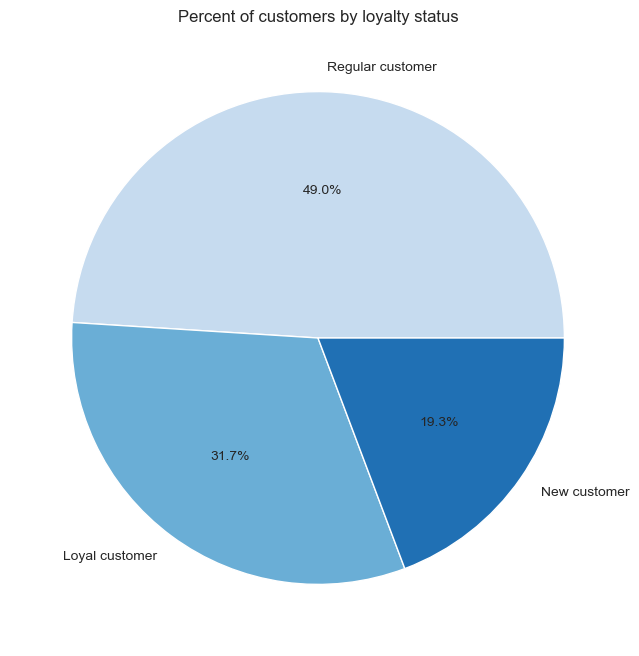

In [147]:
#customer loyalty visualization 
pie_user_loyalty = df['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percent of customers by loyalty status',fontsize=12)
plt.show()

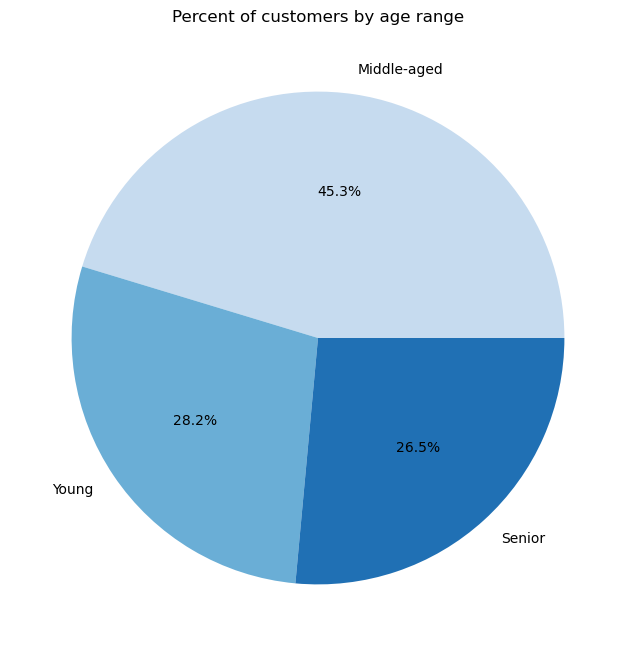

In [33]:
# Age Flag Visualization
pie_user_age = df['age_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percent of customers by age range',fontsize=12)
plt.show()

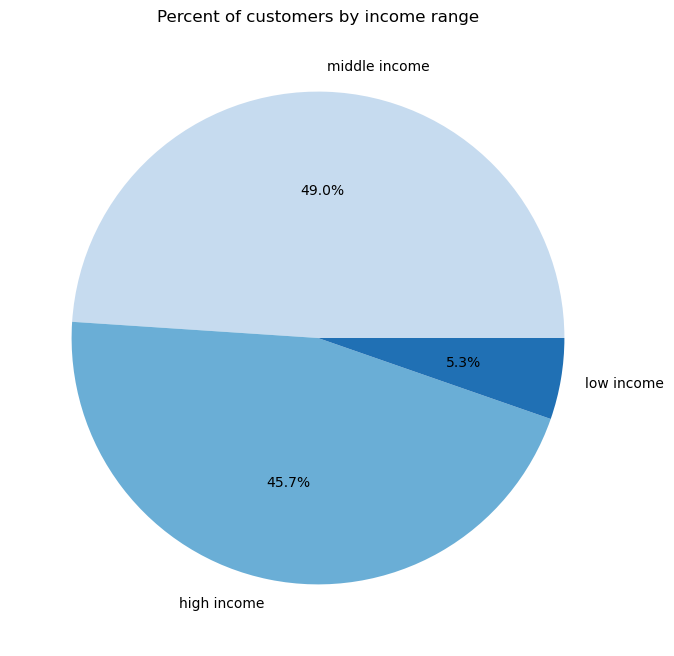

In [34]:
#Pie chart of customer income ranges
pie_user_income = df['income_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                                      colors = sns.color_palette('Blues', 3), 
                                                                      autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percent of customers by income range',fontsize=12)
plt.show()

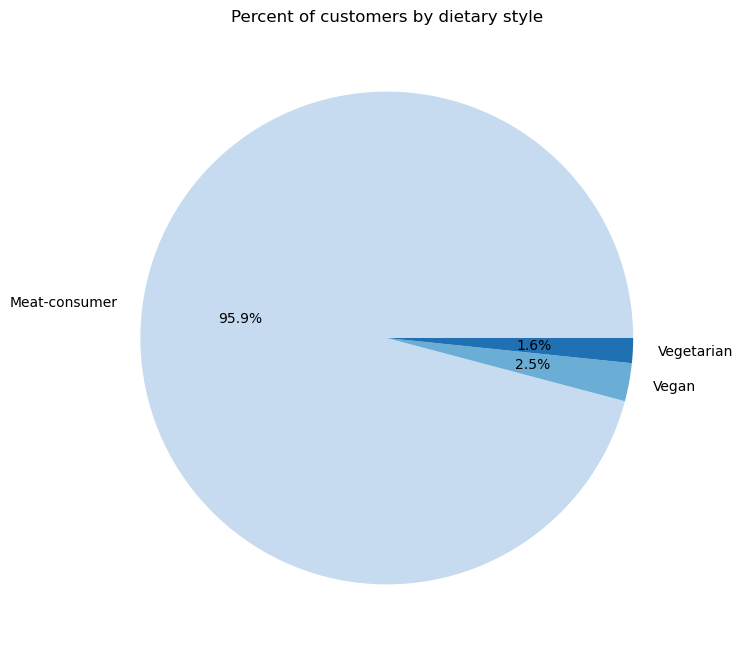

In [35]:
#pie chart of customer diets 
pie_user_diet = df['diet_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                                      colors = sns.color_palette('Blues', 3), 
                                                                      autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percent of customers by dietary style',fontsize=12)
plt.show()

Step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [36]:
#Group the data by age_profile and calculate the max, mean, and min for days_since_prior_order and prices
df.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                              mean   max  min       mean      max  min
age_profile                                                           
Middle-aged              11.105992  30.0  0.0  12.013373  99999.0  1.0
Senior                   11.078641  30.0  0.0  11.768850  99999.0  1.0
Young                    11.124858  30.0  0.0  12.125184  99999.0  1.0

In [37]:
#Group the data by income_profile and calculate the max, mean, and min for days_since_prior_order and prices
df.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                 mean   max  min       mean      max  min
income_profile                                                           
high income                 11.039852  30.0  0.0  16.579486  99999.0  1.0
low income                  11.686944  30.0  0.0   6.495264     25.0  1.0
middle income               11.101346  30.0  0.0   8.282077  99999.0  1.0

In [38]:
#Group the data by diet_profile and calculate the max, mean, and min for days_since_prior_order and prices
df.groupby('diet_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                mean   max  min       mean      max  min
diet_profile                                                            
Meat-consumer              10.945422  30.0  0.0  12.008185  99999.0  1.0
Vegan                      15.299300  30.0  0.0  11.008141  99999.0  1.0
Vegetarian                 14.910948  30.0  0.0  11.824863  99999.0  1.0

Step 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Age

In [39]:
#create crosstab for age and region 
crosstab1 = pd.crosstab(df['age_profile'], df['region'])

In [108]:
#create crosstab for age and department 
crosstab2 = pd.crosstab(df['department_id'],df['age_profile'])

Income

In [41]:
#create crosstab for income and region 
crosstab3 = pd.crosstab(df['income_profile'], df['region'])

In [115]:
#create crosstab for income and department 
crosstab4 = pd.crosstab(df['department_id'], df['income_profile'])

Diet

In [43]:
#create crosstab for diet and region 

In [44]:
crosstab5 = pd.crosstab(df['diet_profile'], df['region'])

In [116]:
#create crosstab for diet and department 
crosstab6 = pd.crosstab(df['department_id'], df['diet_profile'])

Step 9: Produce suitable charts to illustrate your results and export them in your project folder.

Age

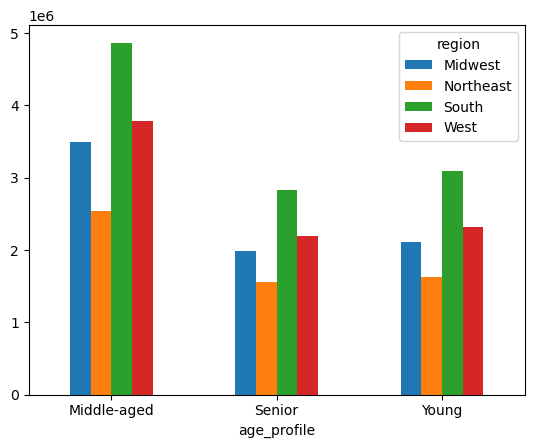

In [46]:
#create bar chart for age_profile and region 
age_region_bar = crosstab1.plot.bar(rot=0)
plt.show()

In [47]:
#export image 
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

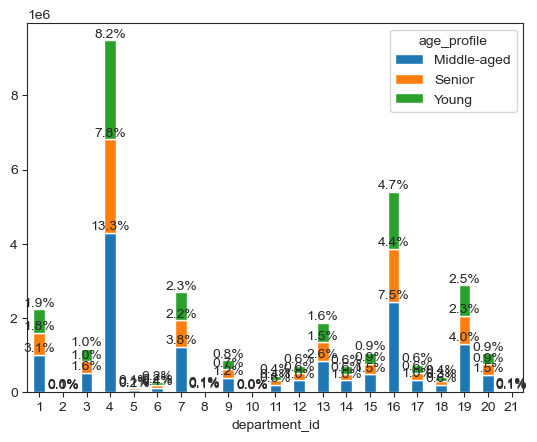

In [114]:
#create bar chart for age_profile and department 
age_dept_bar= crosstab2.plot.bar(stacked=True,rot=0)

# Add percentage labels
totals = []
for container in age_dept_bar.containers:
    for bar in container:
        totals.append(bar.get_height())

total_sum = sum(totals)

# Define the dodge factor to adjust the vertical position of labels
dodge = 5

for container in age_dept_bar.containers:
    for bar in container:
        percentage = f'{(bar.get_height() / total_sum) * 100:.1f}%'
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + bar.get_height() + dodge
        age_dept_bar.annotate(percentage, (x, y), ha='center', va='bottom')
        dodge += 5  # Increase the dodge factor for each bar


plt.show()

In [49]:
#export image 
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dept_bar.png'))

Income

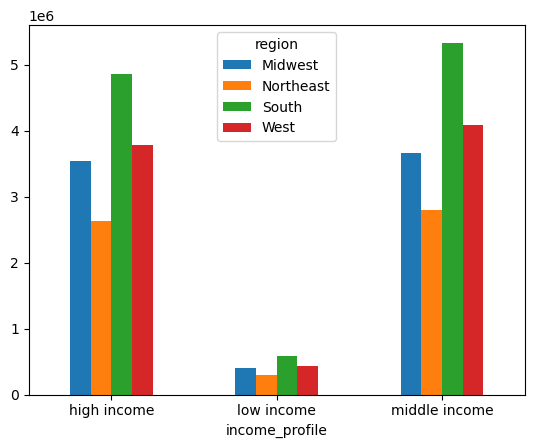

In [50]:
#create bar chart for income_profile and region 
income_region_bar = crosstab3.plot.bar(rot=0)

In [51]:
#export image 
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

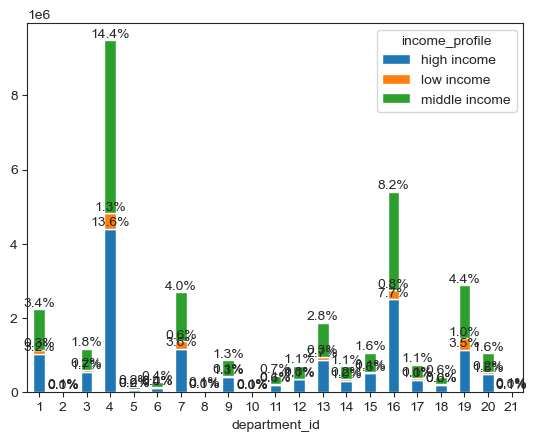

In [126]:
#create bar chart for income_profile and department 
income_department_bar = crosstab4.plot.bar(stacked=True, rot=0)

# Add percentage labels
totals = []
for container in income_department_bar.containers:
    for bar in container:
        totals.append(bar.get_height())

total_sum = sum(totals)
dodge = 5

for container in income_department_bar.containers:
    for bar in container:
        percentage = f'{(bar.get_height() / total_sum) * 100:.1f}%'
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + bar.get_height() + dodge
        income_department_bar.annotate(percentage, (x, y), ha='center', va='bottom')
        dodge += 5

# Display the graph
plt.show()

# Display the chart
plt.show()

In [53]:
#export image 
income_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dept_bar.png'))

Diet

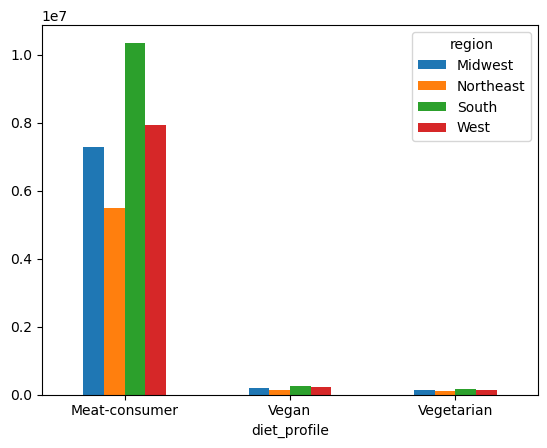

In [54]:
#create bar chart for diet_profile and region
diet_region_bar = crosstab5.plot.bar(rot=0)

In [55]:
#export image 
diet_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_region_bar.png'))

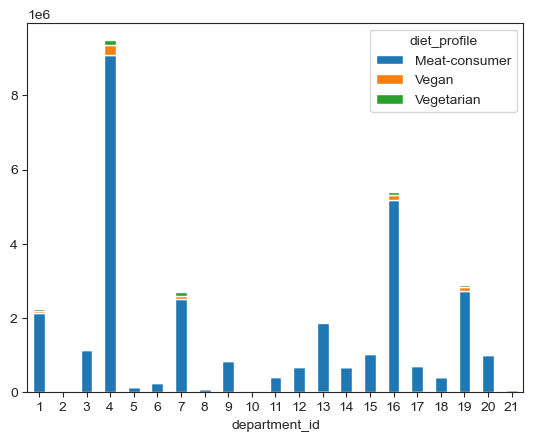

In [131]:
#create bar chart for diet_profile and department 
diet_dept_bar = crosstab6.plot.bar(stacked=True, rot=0)


# Display the graph
plt.show()

In [57]:
#export image 
diet_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_dept_bar.png'))

What are the most popular products?

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Banana'),
  Text(1, 0, 'Bag of Organic Bananas'),
  Text(2, 0, 'Organic Strawberries'),
  Text(3, 0, 'Organic Baby Spinach'),
  Text(4, 0, 'Organic Hass Avocado')])

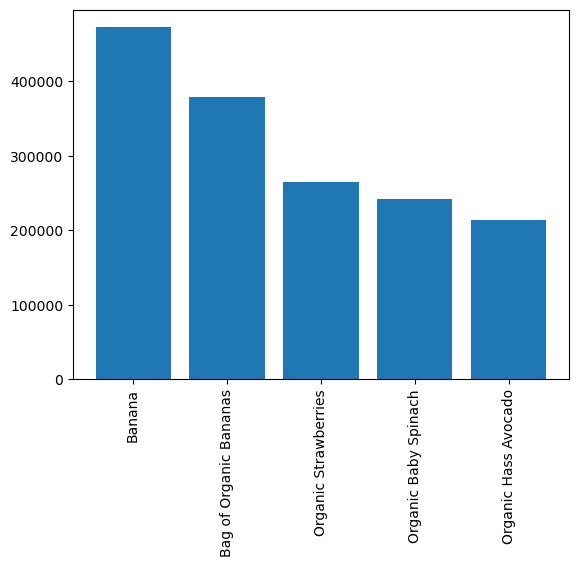

In [73]:
# Count the occurrences of each product and sort them in descending order
product_counts = df['product_name'].value_counts().sort_values(ascending=False)

# Select the top 10 products
top_10_products = product_counts.head(5)

# Create a bar chart
plt.bar(top_10_products.index, top_10_products.values)

plt.xticks(rotation='vertical')

Number of products by department

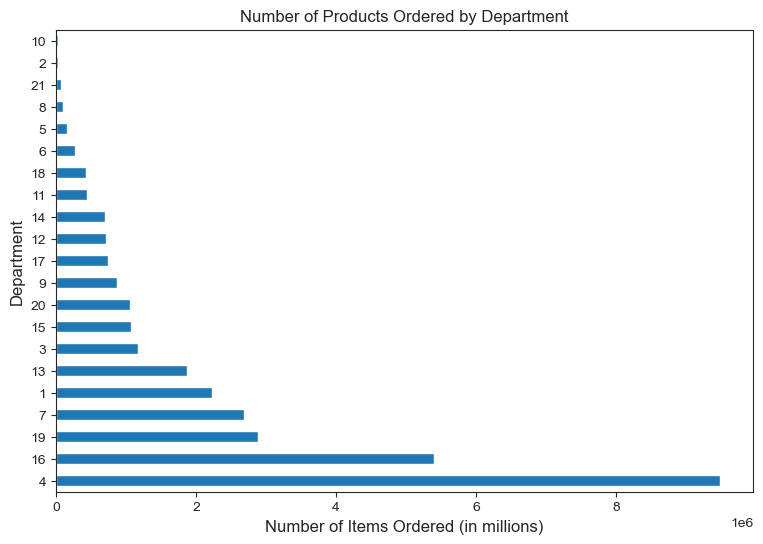

In [105]:
#Bar chart of departments by products ordered
bar_top_depts = df['department_id'].value_counts().plot.barh(figsize = (9,6)), 
sns.set_style('ticks')
plt.xlabel('Number of Items Ordered (in millions)', fontsize = 12)
plt.ylabel('Department', fontsize = 12)
plt.title('Number of Products Ordered by Department')
plt.show()

Are there differences in ordering habits based on a customer's loyalty status?

In [152]:
#create spending flag and loyalty flag crosstab
spending_loyalty = pd.crosstab(df['loyalty_flag'], df['spending_flag'])

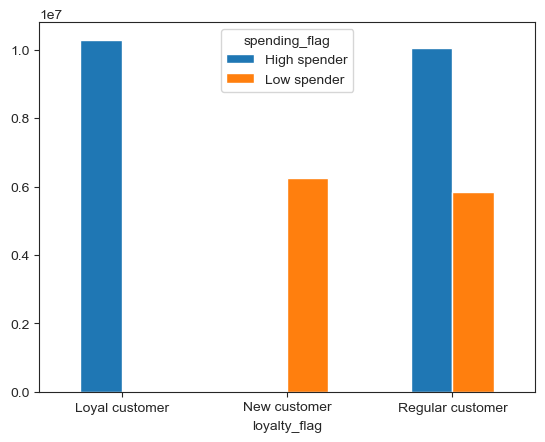

In [153]:
#create bar chart 
spending_loyalty_bar = spending_loyalty.plot.bar(rot=0)

In [159]:
#create frequency and loyalty crosstab
freq_loyalty = pd.crosstab(df['freq_flag'], df['loyalty_flag'])

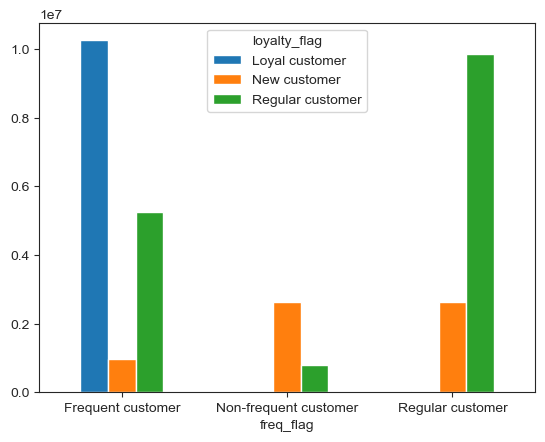

In [160]:
#create bar chart 
freq_loyalty_bar = freq_loyalty.plot.bar(rot=0)

Are there differences in ordering habits based on a customer's region? 

In [142]:
#create department and region crosstab 
crosstab7 = pd.crosstab(df['region'], df['region'])

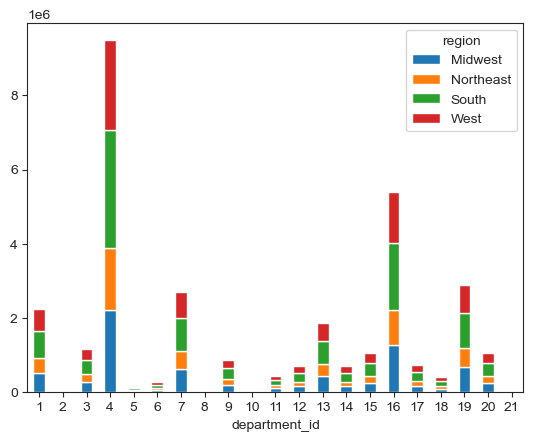

In [140]:
#create bar chart for department and region 
dept_region_bar = crosstab7.plot.bar(stacked=True, rot=0)

# Add percentage labels
totals = []
for container in dept_region_bar.containers:
    for bar in container:
        totals.append(bar.get_height())

total_sum = sum(totals)
dodge = 5

for container in dept_region_bar.containers:
    for bar in container:
        percentage = f'{(bar.get_height() / total_sum) * 100:.1f}%'
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + bar.get_height() + dodge
        income_department_bar.annotate(percentage, (x, y), ha='center', va='bottom')
        dodge += 5

# Display the graph
plt.show()

# Display the chart
plt.show()

What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders and products ordered

Age profile and frequency

In [166]:
age_frequency = pd.crosstab(df['freq_flag'], df['age_profile'])

In [167]:
age_price = pd.crosstab(df['prices'], df['age_profile'])

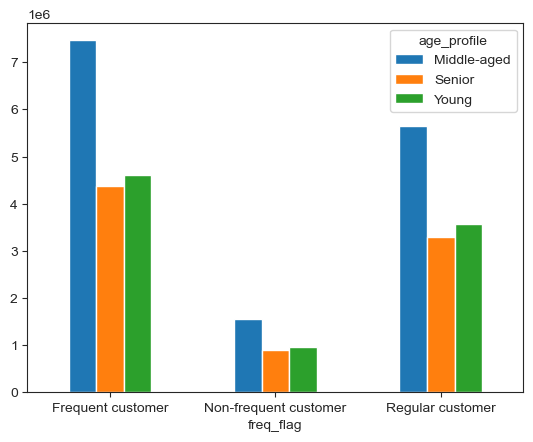

In [168]:
#create graph 
age_frequency_graph = age_frequency.plot.bar(rot=0)

Diet profile and products

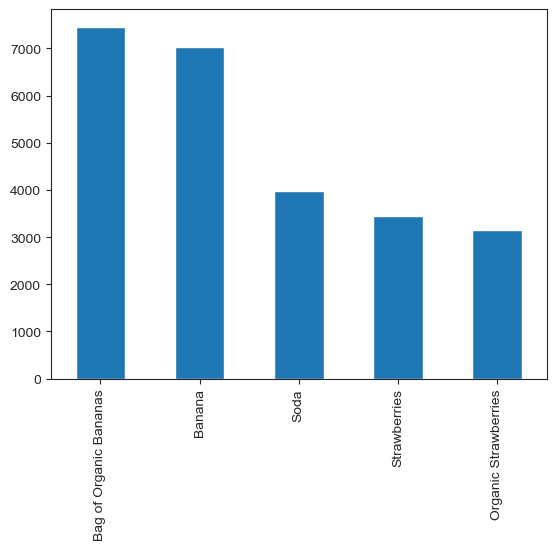

In [184]:
vegetarian_bar = top_5_products.plot.bar()

Income and frequency

In [185]:
income_frequency = pd.crosstab(df['freq_flag'], df['income_profile'])

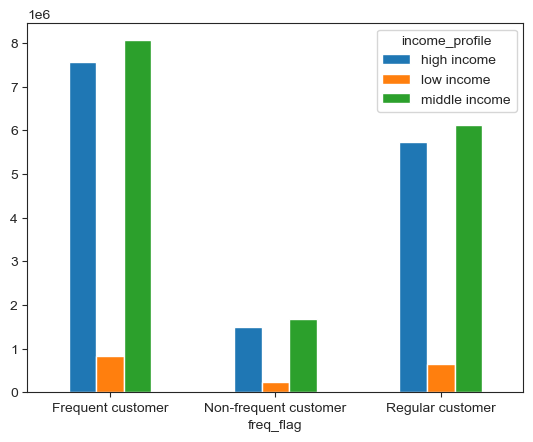

In [186]:
#create graph 
income_frequency_graph = income_frequency.plot.bar(rot=0)

Step 10: Export final data set

In [61]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final.pkl'))

In [62]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,mean_freq,freq_flag,gender,state,age,date_joined,dependents,marital_status,income,region,low_order_flag,age_profile,income_profile,diet_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Young,middle income,Meat-consumer


11. Check Dimensions

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  mean_price              float64 
 21  spendi

In [64]:
df.shape

(32404859, 36)